# Predicting car prices using k-nearest neighbors
## Reading the data

In [168]:
import pandas as pd
col_names = ['symboling',
             'normalized_losses',
             'make',
             'fuel_type',
             'aspiration',
             'num_doors',
             'body_style',
             'drive_wheels',
             'engine_location',
             'wheel_base',
             'length',
             'width',
             'height',
             'curb_weight',
             'engine_type',
             'num_cylinders',
             'engine_size',
             'fuel_system',
             'bore',
             'stroke',
             'compression_ratio',
             'horsepower',
             'peak_rpm',
             'city_mpg',
             'highway_mpg',
             'price']
cars = pd.read_table('imports-85.data', sep=',', header=None, names=col_names)
print(cars.head())

   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel_system  bore  stroke compression_ratio horsepowe

The target column is price. Features that seem relevant at first glance are length, width, height, curb weight, engine size, bore, stroke, compression ratio, horsepower, peak rpm, city and highay mileage. The number of doors can be converted to a numeric column as well so they can be used in the models. 

## Finding missing values, removing them, and normalizing the data

In [169]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_doors            205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_cylinders        205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

Some columns can be removed since they are entirely non numeric and cannot be converted.

In [170]:
cols = ['normalized_losses', 'num_doors', 'num_cylinders', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars = cars[cols]
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    205 non-null object
num_doors            205 non-null object
num_cylinders        205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-null object
peak_rpm             205 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 25.7+ KB
None


Most of the missing values are actually written as "?" in the data.

In [171]:
import numpy as np
cars = cars.replace('?', np.nan)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null object
num_doors            203 non-null object
num_cylinders        205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-null object
peak_rpm             203 non-null object
city_mpg             205 non-null int64
highway_mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 25.7+ KB
None


The number of missing values in the normalized losses column is too high to drop the corresponding rows.

We dont want to alter the price column because it is our objective.

Let's drop rows with missing price values.

In [172]:
cars = cars.dropna(subset=['price'])
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null object
num_doors            199 non-null object
num_cylinders        201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    201 non-null float64
horsepower           199 non-null object
peak_rpm             199 non-null object
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 26.7+ KB
None


The number of doors and number of cylinders can be converted to numeric.

In [174]:
print(cars['num_doors'].value_counts(dropna=False))
print(cars['num_cylinders'].value_counts(dropna=False))

four    113
two      86
NaN       2
Name: num_doors, dtype: int64
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: num_cylinders, dtype: int64


In [175]:
def convert_number(string):
    if string == 'two':
        return 2
    elif string == 'three':
        return 3
    elif string == 'four':
        return 4
    elif string == 'five':
        return 5
    elif string == 'six':
        return 6
    elif string == 'eight':
        return 8
    elif string == 'twelve':
        return 12      
    
cars['num_doors'] = cars['num_doors'].apply(convert_number)
cars['num_cylinders'] = cars['num_cylinders'].apply(convert_number)
print(cars['num_doors'].value_counts(dropna=False))
print(cars['num_cylinders'].value_counts(dropna=False))

 4.0    113
 2.0     86
NaN       2
Name: num_doors, dtype: int64
4     157
6      24
5      10
8       4
2       4
12      1
3       1
Name: num_cylinders, dtype: int64


In [176]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    164 non-null object
num_doors            199 non-null float64
num_cylinders        201 non-null int64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
bore                 197 non-null object
stroke               197 non-null object
compression_ratio    201 non-null float64
horsepower           199 non-null object
peak_rpm             199 non-null object
city_mpg             201 non-null int64
highway_mpg          201 non-null int64
price                201 non-null object
dtypes: float64(6), int64(4), object(6)
memory usage: 26.7+ KB
None


Lets finish by filling the missing rows with their col means 

In [178]:
cars = cars.astype('float')
cars = cars.fillna(cars.mean())
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 16 columns):
normalized_losses    201 non-null float64
num_doors            201 non-null float64
num_cylinders        201 non-null float64
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression_ratio    201 non-null float64
horsepower           201 non-null float64
peak_rpm             201 non-null float64
city_mpg             201 non-null float64
highway_mpg          201 non-null float64
price                201 non-null float64
dtypes: float64(16)
memory usage: 26.7 KB
None


With the data fixed, it can now be normalized such that all values count equally in a nearest neighbor model.

In [179]:
cars_normalized = (cars - cars.min())/(cars.max() - cars.min())
cars_normalized['price'] = cars['price']
print(cars_normalized.head())

   normalized_losses  num_doors  num_cylinders  wheel_base    length  \
0           0.298429        0.0            0.2    0.058309  0.413433   
1           0.298429        0.0            0.2    0.058309  0.413433   
2           0.298429        0.0            0.4    0.230321  0.449254   
3           0.518325        1.0            0.2    0.384840  0.529851   
4           0.518325        1.0            0.3    0.373178  0.529851   

      width    height  curb_weight      bore    stroke  compression_ratio  \
0  0.324786  0.083333     0.411171  0.664286  0.290476             0.1250   
1  0.324786  0.083333     0.411171  0.664286  0.290476             0.1250   
2  0.444444  0.383333     0.517843  0.100000  0.666667             0.1250   
3  0.504274  0.541667     0.329325  0.464286  0.633333             0.1875   
4  0.521368  0.541667     0.518231  0.464286  0.633333             0.0625   

   horsepower  peak_rpm  city_mpg  highway_mpg    price  
0    0.294393  0.346939  0.222222     0.289474

## Univariate 5 nearest neighbors model

In [182]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(training_col, target_col, df):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor()
    knn.fit(training_data[[training_col]], training_data[target_col])
    prediction = knn.predict(testing_data[[training_col]])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

col_list = cars_normalized.columns.tolist()
col_list.remove('price')
rmses = {}

for col in col_list:
    rmses[col] = knn_train_test(col, 'price', cars_normalized)
    

rmses = sorted(rmses.items(), key=lambda kv: kv[1])
rmses

[('horsepower', 4267.730361029788),
 ('highway_mpg', 4628.7930938146865),
 ('city_mpg', 4814.77801484941),
 ('num_cylinders', 5107.160475952241),
 ('curb_weight', 5166.828580646175),
 ('width', 7110.412630045104),
 ('compression_ratio', 8096.301512113387),
 ('normalized_losses', 8131.436882072488),
 ('length', 8304.189346264562),
 ('stroke', 9334.714914185055),
 ('num_doors', 9628.229658809156),
 ('peak_rpm', 9759.209969770063),
 ('wheel_base', 9969.243291700175),
 ('height', 10839.693635873846),
 ('bore', 13397.091693481998)]

With the default number of nearest neighbors (5), the best performing metric is horsepower.
## Univariate k nearest neighbors model
Let's observe the effect of the K parameter on each univariate model

In [183]:
def knn_train_test(training_col, target_col, df, k):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_data[[training_col]], training_data[target_col])
    prediction = knn.predict(testing_data[[training_col]])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

col_list = cars_normalized.columns.tolist()
col_list.remove('price')

rmses = {}
for col in col_list:
    models = {}
    for k in [1, 3, 5, 7, 9]:
        models[k] = knn_train_test(col, 'price', cars_normalized, k)
    rmses[col] = models
    
rmses

{'bore': {1: 16502.858944335483,
  3: 13895.11178798717,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'city_mpg': {1: 5347.150261662008,
  3: 5210.2611302222185,
  5: 4814.77801484941,
  7: 4575.950005056604,
  9: 4770.344178922603},
 'compression_ratio': {1: 8085.605142155501,
  3: 8137.969725694832,
  5: 8096.301512113387,
  7: 7896.692870779086,
  9: 7823.115528549677},
 'curb_weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'highway_mpg': {1: 5188.333470202142,
  3: 4655.081481516726,
  5: 4628.7930938146865,
  7: 4112.387802956751,
  9: 4029.9622707968324},
 'horsepower': {1: 7027.606971265131,
  3: 5400.929793235897,
  5: 4267.730361029788,
  7: 3821.376566368764,
  9: 3461.132024333479},
 'length': {1: 10053.579063701594,
  3: 8230.05

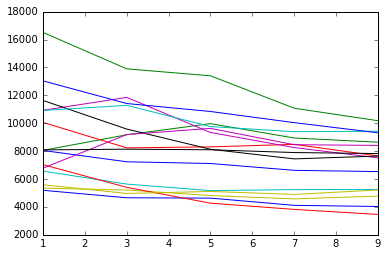

In [184]:
for key,sub_dict in rmses.items():
    x = list(sub_dict.keys())
    y = list(sub_dict.values())
    xy = list(sorted(zip(x,y)))
    x = [e[0] for e in xy]
    y = [e[1] for e in xy]
    plt.plot(x,y, label=key)


## Multivariate model
Let's find the best features to try multivariate models and use them together.

In [185]:
avg_rmses = {}
for key,sub_dict in rmses.items():
    avg_rmses[key] = np.mean(list(sub_dict.values()))

avg_rmses = sorted(avg_rmses.items(), key=lambda kv: kv[1])

avg_rmses

[('highway_mpg', 4522.911623857428),
 ('horsepower', 4795.755143246612),
 ('city_mpg', 4943.696718142569),
 ('num_cylinders', 5153.114767359756),
 ('curb_weight', 5570.589863746505),
 ('width', 7108.476258297131),
 ('compression_ratio', 8007.936955858497),
 ('num_doors', 8492.619352282132),
 ('length', 8545.374123282701),
 ('normalized_losses', 8885.006587652755),
 ('wheel_base', 8953.712114458103),
 ('stroke', 9576.240416192686),
 ('peak_rpm', 10154.303500658927),
 ('height', 10927.52970357331),
 ('bore', 13009.824975293473)]

In [186]:
def knn_train_test_multi(training_cols, target_col, df):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor()
    knn.fit(training_data[training_cols], training_data[target_col])
    prediction = knn.predict(testing_data[training_cols])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

rmse_two_best = knn_train_test_multi(['highway_mpg', 'horsepower'], 'price', cars_normalized)
rmse_three_best = knn_train_test_multi(['highway_mpg', 'horsepower', 'city_mpg'], 'price', cars_normalized)
rmse_four_best = knn_train_test_multi(['highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders'], 'price', cars_normalized)
rmse_five_best = knn_train_test_multi(['highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders', 'curb_weight'], 'price', cars_normalized)

print(rmse_two_best, rmse_three_best, rmse_four_best,rmse_five_best)

3325.4272035840195 3836.2190466475436 3789.7539575821934 3681.001458923109


## Hyperparameter optimization
Let's vary k in the models obtained above.

In [187]:
def knn_train_test_multi(training_cols, target_col, df, k):
    rand_df = df.reindex(np.random.permutation(df.index))
    threshold = int(.5 * len(df))
    training_data = df[:threshold]
    testing_data = df[threshold:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(training_data[training_cols], training_data[target_col])
    prediction = knn.predict(testing_data[training_cols])
    return mean_squared_error(prediction, testing_data[target_col])**0.5

best_models = {'two_best' : ['highway_mpg', 'horsepower'],
               'three_best' : ['highway_mpg', 'horsepower', 'city_mpg'],
              'four_best' : ['highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders'],
              'five_best' : ['highway_mpg', 'horsepower', 'city_mpg', 'num_cylinders', 'curb_weight']}

rmses = {}
for models, cols in best_models.items():
    hyper_parameter_settings = {}
    for k in range(1,26):
        hyper_parameter_settings[k] = knn_train_test_multi(cols, 'price', cars_normalized, k)
    rmses[models] = hyper_parameter_settings

rmses

{'five_best': {1: 3830.641715234544,
  2: 3974.701031474438,
  3: 4250.677631864477,
  4: 3650.7181016612376,
  5: 3681.001458923109,
  6: 3621.5748497289433,
  7: 3654.123106562603,
  8: 3649.6881639815383,
  9: 3609.0933655363897,
  10: 3665.1907327755484,
  11: 3697.71663606011,
  12: 3573.7874118271216,
  13: 3520.9474944724475,
  14: 3482.855813089405,
  15: 3437.0752757123446,
  16: 3457.3234285113144,
  17: 3456.631106317172,
  18: 3506.1272212317003,
  19: 3534.127011593107,
  20: 3558.6367424274226,
  21: 3389.4674218338514,
  22: 3354.087973922819,
  23: 3346.3768066148414,
  24: 3308.929629849144,
  25: 3310.4914391684993},
 'four_best': {1: 3647.0610831948584,
  2: 3604.3753454916596,
  3: 3605.606926140255,
  4: 3501.496288805659,
  5: 3789.7539575821934,
  6: 3809.1396028534314,
  7: 3773.8324034186717,
  8: 3918.2257658770027,
  9: 4013.2149651262653,
  10: 3948.426464735761,
  11: 3947.416670164341,
  12: 3970.4126100363474,
  13: 4048.6093917579024,
  14: 4089.65924927

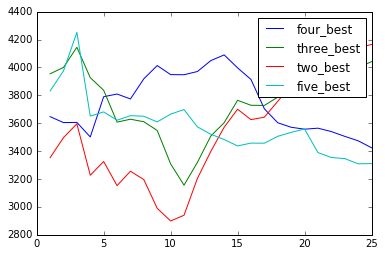

In [189]:
for key,sub_dict in rmses.items():
    x = list(sub_dict.keys())
    y = list(sub_dict.values())
    xy = list(sorted(zip(x,y)))
    x = [e[0] for e in xy]
    y = [e[1] for e in xy]
    plt.plot(x,y, label=key)
plt.legend()

Best model found is one of hi